## Kaggle Reuse Experiment
In this notebook, we make the plot in Figure 8 of Section 6.4.

Experiment result is located here:

'./experiment_results/remote/reuse/kaggle_home_credit/cloud-41/2019-10-19/09-49.csv'


In [26]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
FONT_SIZE = 25
LW=4
plt.rcParams.update({
    "lines.markersize": 20,
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,   
    "font.family": "serif",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": FONT_SIZE,     
    "font.size": FONT_SIZE,
    "legend.fontsize": FONT_SIZE, 
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    #"figure.figsize": figsize(1.0), 
     "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
})
plt.rc('hatch', color='white', linewidth=LW)

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results'


SYSTEM_COLOR = sns.color_palette()[0]
ALL_MAT_COLOR = sns.color_palette()[1]
HELIX_COLOR = sns.color_palette()[2]
ALL_COMPUTE_COLOR = sns.color_palette()[3]
BOTTOMUP_COLOR = sns.color_palette()[4]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/slides/assets'

output_directory = WRITE_DIRECTORY_ROOT + '/experiment-results'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
def savefig(filename):
    plt.savefig('{}.pgf'.format(filename), bbox_inches='tight')
    plt.savefig('{}.pdf'.format(filename), bbox_inches='tight')
    plt.savefig('{}.eps'.format(filename), bbox_inches='tight')

In [27]:
result_folder = ROOT_RESULT_FOLDER + '/remote/reuse/kaggle_home_credit'
# IN PAPER = result_folder + '/cloud-41/2019-10-19/09-49.csv'
result_file = result_folder + '/cloud-41/2020-02-04/09-50.csv'

In [28]:
result_folder = ROOT_RESULT_FOLDER + '/remote/reuse_benchmarking/kaggle_home_credit'
# IN PAPER = result_folder + '/cloud-41/2019-10-19/09-49.csv'
result_file = result_folder + '/cloud-41/2020-02-14/23-47.csv'

HEADERS = [
   'exp_id', 'n', 'workload_size','LN', 'HL'
]
LN ='Colab-reuse'
HL ='Helix'
reuse_map = {'LN':LN,'HL':HL}
reuse_result = pd.read_csv(result_file, header=None, names=HEADERS)
reuse_df = pd.melt(reuse_result, id_vars=['exp_id','workload_size', 'n'], var_name ='type',value_name='run_time', value_vars=['LN', 'HL'])
reuse_df['type'] = reuse_df['type'].replace(reuse_map)
reuse_df['cumulative_run_time'] = reuse_df.groupby(['exp_id', 'type'])['run_time'].apply(lambda x: x.cumsum())

                   

In [36]:
def plot_reuse_overhead(df,ax):
#     plt.figure(figsize=(8, 4))
    plot = sns.lineplot(
        data=df,
        ax=ax,
        estimator='mean',
        x='n',
        y='cumulative_run_time',
        hue='type',
        style='type',
        lw=LW,
        ci='sd',
        hue_order=[LN, HL],
        dashes={
            LN: (1, 0),
            HL: (2, 2),
        },
        palette={
            LN: SYSTEM_COLOR,
            HL:HELIX_COLOR,
        },
        legend='brief')
    plot.get_legend().remove()
    plot.set_xlabel('Number of Workloads')
    plot.set_ylabel('Cumulative \nOverhead (s)')
    
    handles = []
    labels = [LN,HL]
    from matplotlib.lines import Line2D
    handles.append(Line2D([0], [1],
                        color=SYSTEM_COLOR,
                        lw=5,
                        dashes=(1, 0)))
    
    handles.append(Line2D([0], [1],
                        color=HELIX_COLOR,
                        lw=5,
                        dashes=(2, 2)))
    

    plt.xscale('log')
    plot.set_xticks([ 1.00000000e-0,   1.00000000e+01,   1.00000000e+02, 1.00000000e+03,   1.00000000e+04])
    plot.set_yticks([0, 1000, 2000, 3000 ])
    plot.yaxis.set_major_formatter(ticker.EngFormatter(sep=''))
    ax.tick_params(axis='x',pad=-1.5)
    legend = plot.legend(
        handles,
        labels,
        frameon=True,
        loc='upper center',
        handlelength=2,
        #handletextpad=0.1,
        numpoints=1,
        ncol=2,
        columnspacing=2,
        bbox_to_anchor=(.50, 1.3))
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(2.0)
    
    return plot

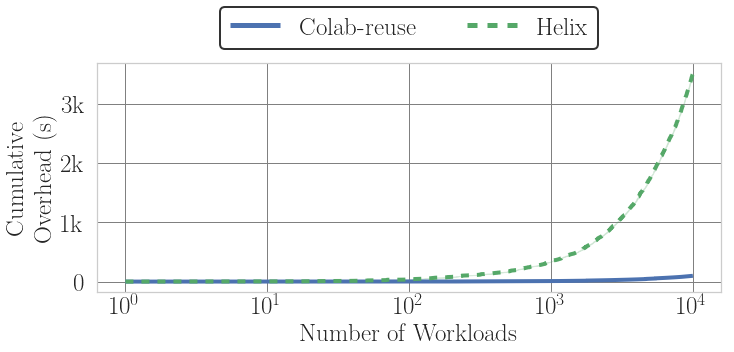

In [37]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 4)) 
ax = fig.add_subplot(111)
p1=plot_reuse_overhead(reuse_df, ax)

fig.tight_layout(pad=0,h_pad=0,w_pad=0)
savefig(output_directory+'/reuse-overhead')